<a href="https://colab.research.google.com/github/yuvalBerghaus/computer_vision/blob/main/ex_3_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The focus of the given code is to blur an image using a bluring average filter 3x3 on a grayscale image


This Is Before



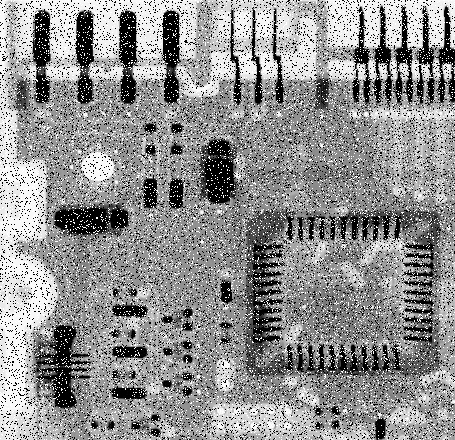



This is after



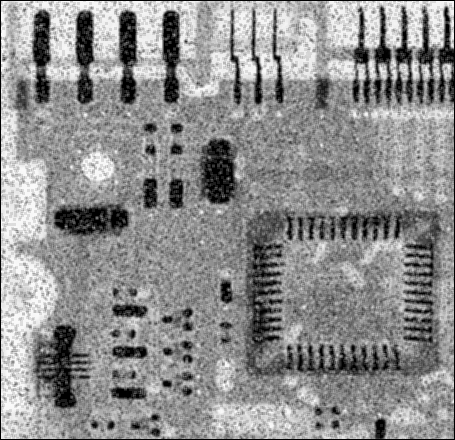

In [28]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Read the image
img = cv2.imread('sample.png', 0)
print("\nThis Is Before\n")
cv2_imshow(img)
# Obtain number of rows and columns of the image
m, n = img.shape

# Develop filtering (3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])

for i in range(1, m-1):
  for j in range(1, n-1):
    temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0,1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i,j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2,0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
    img_new[i, j]= temp

img_new = img_new.astype(np.uint8)
cv2.imwrite('blurred.tif', img_new)
print("\n\nThis is after\n")
cv2_imshow(img_new)


in the code above, we can that a simple blurring filter is being used to an input image using a 3x3 averaging mask that reduces the noise and sharp edges in the image.


Before: 



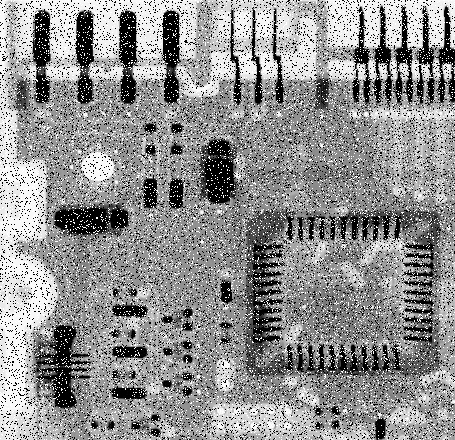


After:



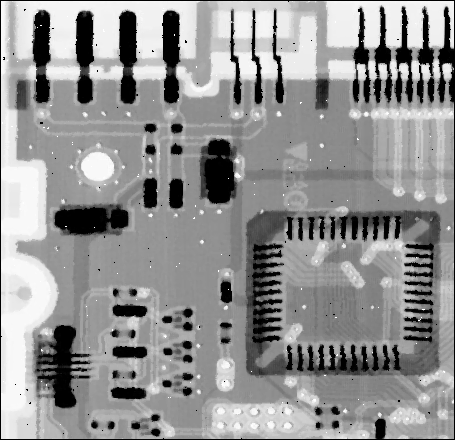

True

In [36]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Read the image
img_noisy1 = cv2.imread('sample.png', 0)

# Obtain the number of rows and columns of the image
m, n = img_noisy1.shape
print("\nBefore: \n")
cv2_imshow(img_noisy1)
# Traverse the image. Develop filtering (3, 3) mask
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
  for j in range(1, n-1):
    temp = [img_noisy1[i-1, j-1],
            img_noisy1[i-1, j],
            img_noisy1[i-1, j + 1],
            img_noisy1[i, j-1],
            img_noisy1[i, j],
            img_noisy1[i, j + 1],
            img_noisy1[i + 1, j-1],
            img_noisy1[i + 1, j],
            img_noisy1[i + 1, j + 1]]

    temp = sorted(temp)
    img_new1[i, j]= temp[4]

temp = sorted(temp)
img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
print("\nAfter:\n")
cv2_imshow(img_new1)
cv2.imwrite('new_filtered.png', img_new1) 

In this code above, we are using a 3x3 median filter to a noisy grayscale image, replacing each pixel with the median value of its neighboring pixels. This process removes isolated noise while preserving image structure, resulting in a filtered image with reduced noise.







Here we can see the original photo before performing filter



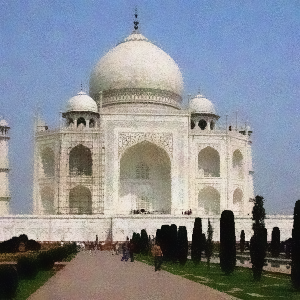


Blurring filter



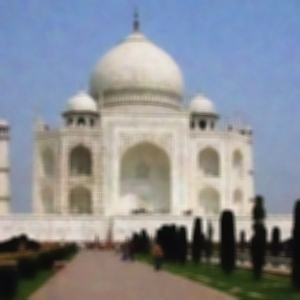


Median blurring filter



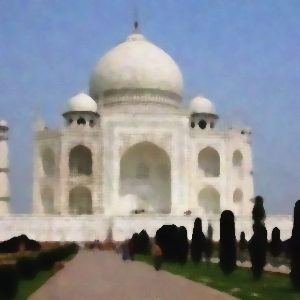


Gaussian blurring filter



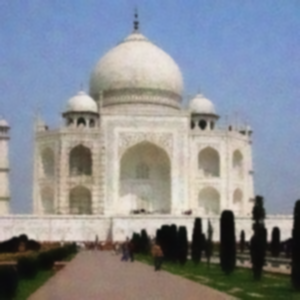

True

In [39]:
import cv2
from google.colab.patches import cv2_imshow
# Read the image
img = cv2.imread('taj.jpg')

# Apply bilateral filter with d = 15,
# sigmaColor = sigmaSpace = 75
bilateral = cv2.bilateralFilter(img, 15, 75, 75)

# Save the output
cv2.imwrite('taj_bilateral.jpg', bilateral)
print("\nHere we can see the original photo before performing filter\n")
cv2_imshow(bilateral)
copy1 = bilateral.copy()
copy1 = cv2.blur(copy1, (5, 5))
print("\nBlurring filter\n")
cv2_imshow(copy1)
cv2.imwrite('taj_bilateral_blur.jpg', copy1)
copy2 = bilateral.copy()
print("\nMedian blurring filter\n")
copy2 = cv2.medianBlur(copy2, 5)
cv2_imshow(copy2)
cv2.imwrite('taj_bilateral_median_blur.jpg', copy2)
copy3 = bilateral.copy()
copy3 = cv2.GaussianBlur(copy3, (5, 5), 0)
print("\nGaussian blurring filter\n")
cv2_imshow(copy3)
cv2.imwrite('taj_bilateral_GaussianBlur.jpg', copy3)

**Guassian_Blur**
The best option for filtering for this photo